In [28]:
import json
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# RAG sources analysis (bubble slide)

In [ ]:
question_type = ["MC", "TF", "SA", "MH"]

data = {}

for qt in question_type:
  q_nbrs = 500
  if qt in ["MC", "TF"]:
    q_nbrs = 1000
  json_file_path = f"/content/drive/MyDrive/NLP/05_Results/AdvRAG_7bcoder_{qt}_{q_nbrs}/RAG_sources.json"
  with open(json_file_path, 'r') as file:
      data[qt] = json.load(file)


In [ ]:
sources_per_qt = {
    qt: {"MC": 0, "TF": 0, "SA": 0, "MH": 0, "PubMed": 0} for qt in question_type
}

In [ ]:
sources_per_qt

{'MC': {'MC': 0, 'TF': 0, 'SA': 0, 'MH': 0, 'PubMed': 0},
 'TF': {'MC': 0, 'TF': 0, 'SA': 0, 'MH': 0, 'PubMed': 0},
 'SA': {'MC': 0, 'TF': 0, 'SA': 0, 'MH': 0, 'PubMed': 0},
 'MH': {'MC': 0, 'TF': 0, 'SA': 0, 'MH': 0, 'PubMed': 0}}

In [ ]:
data

{'MC': {'SA3-thedevastator/comprehensive-medical-q-a-dataset': 48,
  'SA1-HPAI-BSC/OpenMedQA': 38,
  'MH-FreedomIntelligence/medical-o1-reasoning-SFT': 626,
  'MC3-openlifescienceai/medmcqa': 3095,
  'SA2-Ajayaadhi/Medical-QA': 317,
  'MC4-UCSC-VLAA/MedReason': 343,
  'MC2-stellalisy/mediQ': 56,
  'TF2-qiaojin/PubMedQA': 134,
  'MC1-bigbio/med_qa': 343,
  'PubMed': 0},
 'TF': {'SA3-thedevastator/comprehensive-medical-q-a-dataset': 25,
  'SA1-HPAI-BSC/OpenMedQA': 3,
  'MH-FreedomIntelligence/medical-o1-reasoning-SFT': 84,
  'MC3-openlifescienceai/medmcqa': 319,
  'SA2-Ajayaadhi/Medical-QA': 81,
  'MC4-UCSC-VLAA/MedReason': 24,
  'MC2-stellalisy/mediQ': 5,
  'TF2-qiaojin/PubMedQA': 4437,
  'MC1-bigbio/med_qa': 21,
  'PubMed': 1},
 'SA': {'SA2-Ajayaadhi/Medical-QA': 1030,
  'MH-FreedomIntelligence/medical-o1-reasoning-SFT': 107,
  'SA1-HPAI-BSC/OpenMedQA': 17,
  'MC2-stellalisy/mediQ': 16,
  'MC3-openlifescienceai/medmcqa': 552,
  'MC4-UCSC-VLAA/MedReason': 48,
  'SA3-thedevastator/compre

In [ ]:
sources

{'SA3-thedevastator/comprehensive-medical-q-a-dataset': 9,
 'SA1-HPAI-BSC/OpenMedQA': 27,
 'MH-FreedomIntelligence/medical-o1-reasoning-SFT': 991,
 'MC3-openlifescienceai/medmcqa': 771,
 'SA2-Ajayaadhi/Medical-QA': 54,
 'MC4-UCSC-VLAA/MedReason': 244,
 'MC2-stellalisy/mediQ': 40,
 'TF2-qiaojin/PubMedQA': 36,
 'MC1-bigbio/med_qa': 328,
 'PubMed': 0}

In [ ]:
for qt, sources in data.items():
    for source, count in sources.items():
      if source == "PubMed":
        sources_per_qt[qt][source] += count
      else:
        source = source[:2]
        sources_per_qt[qt][source] += count

In [ ]:
sources_per_qt

{'MC': {'MC': 3837, 'TF': 134, 'SA': 403, 'MH': 626, 'PubMed': 0},
 'TF': {'MC': 369, 'TF': 4437, 'SA': 109, 'MH': 84, 'PubMed': 1},
 'SA': {'MC': 677, 'TF': 203, 'SA': 1511, 'MH': 107, 'PubMed': 2},
 'MH': {'MC': 1383, 'TF': 36, 'SA': 90, 'MH': 991, 'PubMed': 0}}

In [ ]:
bubble_coord = {
 'MC': {'MC': (1, 4), 'TF': (2, 4), 'SA': (3, 4), 'MH': (4, 4), 'PubMed': (5, 4)},
 'TF': {'MC': (1, 3), 'TF': (2, 3), 'SA': (3, 3), 'MH': (4, 3), 'PubMed': (5, 3)},
 'SA': {'MC': (1, 2), 'TF': (2, 2), 'SA': (3, 2), 'MH': (4, 2), 'PubMed': (5, 2)},
 'MH': {'MC': (1, 1), 'TF': (2, 1), 'SA': (3, 1), 'MH': (4, 1), 'PubMed': (5, 1)}
}


In [ ]:
df = pd.DataFrame(columns = ["x", "y", "entries"])

In [ ]:
for qt, sources in sources_per_qt.items():
  for source, count in sources.items():
    x, y = bubble_coord[qt][source]
    df.loc[len(df)] = [x, y, count]

In [ ]:
df.to_excel("bubble_chart_data.xlsx", index=False)

# Text evaluation

In [29]:
question_type = ["SA", "MH"]
architectures = ["BASE", "FT", "AdvRAG", "AdvRAGplusFT"]

scores = {qt: {} for qt in question_type}

for qt in question_type:
  q_nbrs = 500
  if qt in ["MC", "TF"]:
    q_nbrs = 1000
  for architecture in architectures:
    json_file_path = f"/content/drive/MyDrive/NLP/05_Results/{architecture}_7bcoder_{qt}_{q_nbrs}/averaged_scores.json"
    with open(json_file_path, 'r') as file:
        scores[qt][architecture] = json.load(file)

In [30]:
scores

{'SA': {'BASE': {'avg_bleu': 0.013566921093334804,
   'avg_meteor': 0.06068491501717179,
   'rouge1': 0.08443039638059012,
   'rouge2': 0.03260469526134465,
   'rougeL': 0.0613695595070577,
   'word_similarity': 0.261695221146741,
   'sentence_similarity': 0.23727248483561736,
   'paragraph_similarity': 0.261695221146741,
   'semantic_match_score': 0.2543684002534039,
   'precision': 0.7805252075195312,
   'recall': 0.7913456559181213,
   'f1': 0.7853663563728333,
   'avg_cosine_similarity': 0.261695221146741,
   'avg_reasoning_coherence': 0.1909985954959432},
  'FT': {'avg_bleu': 0.048498057042039876,
   'avg_meteor': 0.2066435180104819,
   'rouge1': 0.2627076874771316,
   'rouge2': 0.10921294121096219,
   'rougeL': 0.1875882810833192,
   'word_similarity': 0.8361659049987793,
   'sentence_similarity': 0.6651050635389983,
   'paragraph_similarity': 0.8361659049987793,
   'semantic_match_score': 0.7848476679254323,
   'precision': 0.8342841863632202,
   'recall': 0.8376531004905701,
  

In [32]:
df = pd.DataFrame(columns = ["architecture", "question_type", "score", "value"])
for architecture in architectures:
  for qt in question_type:
    for key, value in scores[qt][architecture].items():
      df.loc[len(df)] = [architecture, qt, key, value]

df.to_excel("Text_eval_data.xlsx", index=False)

# Analysis of blocked answer base model SA and MH

In [36]:
question_type = ["SA", "MH"]
architectures = ["BASE"]

preds = []

for qt in question_type:
  q_nbrs = 500
  if qt in ["MC", "TF"]:
    q_nbrs = 1000
  for architecture in architectures:
    json_file_path = f"/content/drive/MyDrive/NLP/05_Results/{architecture}_7bcoder_{qt}_{q_nbrs}/label_n_preds.json"
    with open(json_file_path, 'r') as file:
        data = json.load(file)
        preds += data["predictions"]

In [37]:
preds

["Eosinophilic fasciitis is a rare disease characterized by the infiltration of eosinophils into various parts of the body. The exact cause of Eosinophilic fasciitis is unknown, but it is often associated with allergies, asthma, and other immune system disorders.\n\nHowever, it's important to note that this is a medical question and not a computer science question. As an AI developed by Deepseek, I'm specialized in answering questions related to computer",
 'N/A',
 'Polycythemia is a condition characterized by an increase in the number of red blood cells in the body. This condition is also known as increased red cell count or normocytic normochromic hypercythemia. It is often associated with other conditions such as chronic kidney disease, anemia, and hypertension.\n\nPolycythemia can be classified into two types: secondary and primary. Secondary polycythemia is a result of underlying conditions like kidney disease, anemia,',
 'Cardiac amyloidosis is a condition where a protein called 

In [43]:
na_counter = 0
for pred in preds:
  if pred == "N/A":
    na_counter += 1

In [44]:
na_counter

529

In [68]:
i_am_sorry_counter = 0
for pred in preds:
  phrases = [
      "deepseek",
      "openAI",
    "As an AI developed by DeepSeek",
    "As an AI created by OpenAI",
    "As an assistant developed by Google",
      "i am sorry",
      "sorry"
  ]

  if any(p.lower() in pred.lower() for p in phrases):
    i_am_sorry_counter += 1

In [69]:
i_am_sorry_counter

58

In [70]:
na_counter + i_am_sorry_counter

587

# MH FT answer distribution

In [103]:
json_file_path = "/content/drive/MyDrive/NLP/05_Results/AdvRAGplusFT_7bcoder_MH_500/per_sentence_scores.json"
with open(json_file_path, 'r') as file:
    per_sentence_scores = json.load(file)

In [104]:
per_sentence_scores.keys()

dict_keys(['bleu', 'meteor', 'rouge1', 'rouge2', 'rougeL', 'cosine_similarity', 'reasoning_coherence', 'word_similarity', 'sentence_similarity', 'paragraph_similarity', 'semantic_match_score'])

In [105]:
rougeL_scores = per_sentence_scores["rougeL"]
bleu_scores = per_sentence_scores["bleu"]
meteor_scores = per_sentence_scores["meteor"]

In [106]:
# Get histogram data
counts_rougeL, bin_edges_rougeL = np.histogram(rougeL_scores, bins=30)
counts_bleu, bin_edges_bleu = np.histogram(bleu_scores, bins=30)
counts_meteor, bin_edges_meteor = np.histogram(meteor_scores, bins=30)

print("rouge")
print("Counts:", counts_rougeL)
print("Bin edges:", bin_edges_rougeL)

print("bleu")
print("Counts:", counts_bleu)
print("Bin edges:", bin_edges_bleu)

print("meteor")
print("Counts:", counts_meteor)
print("Bin edges:", bin_edges_meteor)

rouge
Counts: [ 4  1  3  5 13 30 45 46 45 44 36 28 31 20 26 13 11 19 16 14  3 12  9  6
  5  5  4  2  1  3]
Bin edges: [0.02816901 0.06023976 0.0923105  0.12438124 0.15645198 0.18852272
 0.22059346 0.25266421 0.28473495 0.31680569 0.34887643 0.38094717
 0.41301791 0.44508865 0.4771594  0.50923014 0.54130088 0.57337162
 0.60544236 0.6375131  0.66958385 0.70165459 0.73372533 0.76579607
 0.79786681 0.82993755 0.8620083  0.89407904 0.92614978 0.95822052
 0.99029126]
bleu
Counts: [27 44 48 57 42 53 37 22 22 16 17 19 14 18  9  5  9  9  4  6  4  5  4  1
  1  3  0  2  1  1]
Bin edges: [0.00155395 0.0341882  0.06682245 0.0994567  0.13209095 0.16472521
 0.19735946 0.22999371 0.26262796 0.29526221 0.32789646 0.36053072
 0.39316497 0.42579922 0.45843347 0.49106772 0.52370197 0.55633623
 0.58897048 0.62160473 0.65423898 0.68687323 0.71950748 0.75214174
 0.78477599 0.81741024 0.85004449 0.88267874 0.91531299 0.94794725
 0.9805815 ]
meteor
Counts: [ 1  2  3  3 11 17 12 14 36 32 35 36 36 28 29 37 21 17

In [107]:
df = pd.DataFrame(columns = ["rouge", "bleu", "meteor"])
for i in range(len(counts)):
  df.loc[len(df)] = [counts_rougeL[i], counts_bleu[i], counts_meteor[i]]

df.to_excel("BEST_MH_FT_answer_distribution.xlsx", index=False)

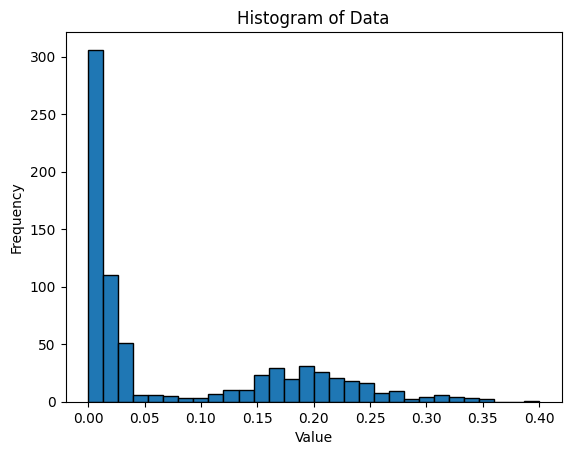

In [90]:
plt.hist(data, bins=30, edgecolor='black')

# Add labels and title
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [109]:
with open('/content/drive/MyDrive/NLP/00_Data/train_dataset.json', 'r') as f:
    trainset = json.load(f)

In [110]:
print("Trainsets:")
for split, split_data in trainset.items():
  print(f"{split}: {len(split_data)}")


Trainsets:
true_false: 169015
multiple_choice: 173861
short_answer: 54060
multi_hop: 15763


In [113]:
tf_counter_trainset = [entry['answer'] for entry in trainset['true_false']]
from collections import Counter

# Assuming tf_counter_trainset is your list of True and False values
count_result = Counter(tf_counter_trainset)

print(count_result)
print("ratio", count_result['True'] / count_result['False'])

Counter({'True': 156875, 'False': 12140})
ratio 12.922158154859966
